# Binary Search Algorithm

Given a sorted list of items, [binary search algorithm](https://en.wikipedia.org/wiki/Binary_search_algorithm) provides an efficient method for searching the list for an item. It runs in logarithmic time, with the worst-case performance being O(Log *n*) where *n* is the number of items on the list.

An iterative Python implementation of the algorithm follows:

In [58]:
import math

aList = range(1000,2000)
lower, upper = 0, len(aList) - 1
target = 1500
counter = 0

while upper >= lower:
    counter = counter + 1
    middle = math.floor((upper+lower)/2)
    if aList[middle] == target:
        print("{:,} found in position {:,} on the list.".format(target, middle))
        print("Total number of iterations: {:,}".format(counter))
        break
    elif target > aList[middle]:
        lower = middle + 1
    else:
        upper = middle - 1
        
if not upper >= lower:
    print("{:,} was not found on the list".format(target))


1,500 found in position 500 on the list.
Total number of iterations: 9


Recursive implementation of this algorithm is perhaps more aesthetically pleasing:

In [59]:
def binary_search(aList, val, lower, upper):
    '''given a sorted list of items, returns the position of the search item 
    on the list or None if the item is not found''' 
    if not upper >= lower:
        return None
    
    middle = math.floor((upper+lower)/2)
    if aList[middle] == val:
        return middle
    
    if target > aList[middle]:
        return binary_search(aList, val, middle+1, upper)
    else:
        return binary_search(aList, val, lower, middle - 1)    
    
# call the recursive function with the variables that were defined for the iterative implementation above
pos = binary_search(aList, target, lower, upper) 

if pos: 
    print("{:,} found in position {:,} on the list.".format(target, pos))
else:
    print("{:,} was not found on the list".format(target))
        

1,500 found in position 500 on the list.


Of course, Python standard library provides a function for binary search:

In [60]:
from bisect import bisect_left

# bisect_left() returns 0 if the search item is not found on the list
pos = bisect_left(aList, target)

if pos:
    print("{:,} found in position {:,} on the list.".format(target, pos))
else:
    print("{:,} was not found on the list".format(target))

1,500 found in position 500 on the list.


How does binary search algorithm compare to linear search? Plotting the worst-case runnning times for these algorithms when searching a list of 1,000 items would give an indication.

It may be recalled that the worst-case running time for binary and linear search algorithms are O(log(*n*)) and O(*n*), respectively.

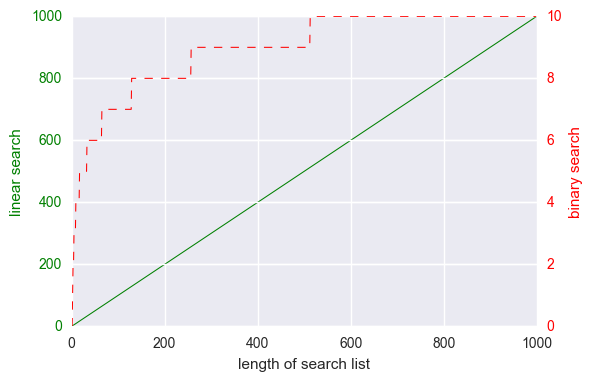

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

fig, ax0 = plt.subplots()

aList = np.arange(1, 1000)
ax0.plot(aList, aList, "g-", linewidth=0.75)
ax0.set_xlabel("length of search list")
ax0.set_ylabel("linear search", color="g")
ax0.tick_params("y", colors="g")

# secondary axis for binary search
ax1 = ax0.twinx()
binTime = np.ceil(np.log2(aList))
ax1.plot(aList, binTime, "r--", linewidth=0.75)
ax1.set_ylabel("binary search", color="r")
ax1.tick_params("y", colors="r")



As the plot shows, given a sorted list of 1,000 items, the worst-case running time is 1,000 for linear search and 10 for binary search. This difference grows very quickly as the size of the list increases.  